In [164]:
# %pip install pip -U
# %pip install numpy
# %pip install matplotlib

In [165]:
import numpy as np
import matplotlib.pyplot as plt


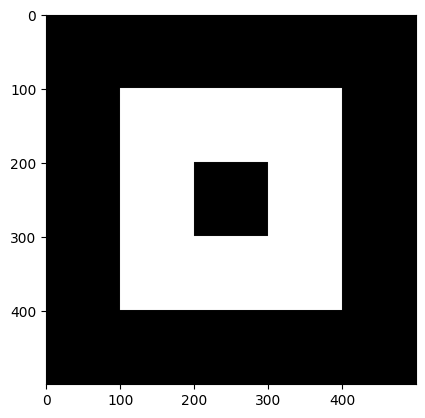

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [235]:
screen = np.zeros((500, 500), dtype=np.uint8)
screen[100:400, 100:400] = 255
screen[200:300, 200:300] = 0
plt.imshow(screen, cmap='gray')
plt.show()
print(screen)

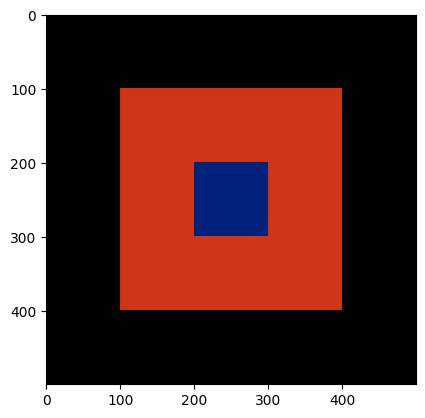

In [167]:
screen = np.zeros((500, 500, 3), dtype=np.uint8)
screen[100:400, 100:400] = [205, 55, 24]
screen[200:300, 200:300] = [0, 34, 123]
plt.imshow(screen)


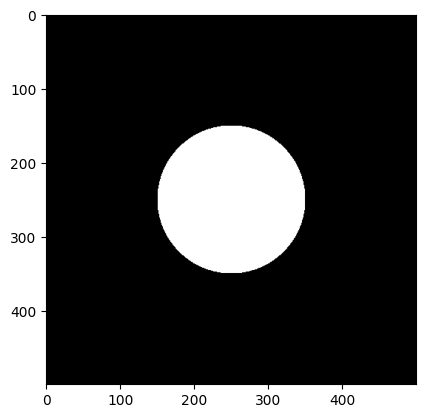

In [168]:
screen = np.zeros((500, 500, 3), dtype=np.uint8)
#draw a circle
for i in range(500):
    for j in range(500):
        if (i-250)**2 + (j-250)**2 < 100**2:
            screen[i, j] = [255, 255, 255]
plt.imshow(screen)

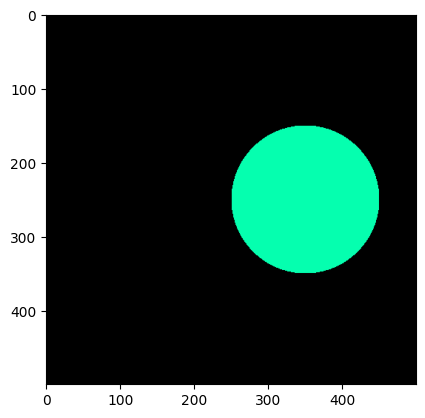

In [243]:
#draw a circle with numpy
screen = np.zeros((500, 500, 3), dtype=np.uint8)
x, y = np.ogrid[:500, :500]
screen_center=(250, 250)
center=(100,0)
mask = (x-screen_center[0]-center[0])**2 + (y-screen_center[1]+center[1])**2 < 100**2
screen[mask] = [5, 255, 175]
screen = np.swapaxes(screen, 0, 1)
plt.imshow(screen)

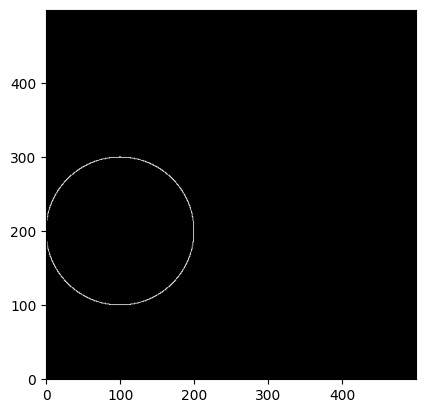

In [247]:
#draw a circle with numpy
screen = np.zeros((500, 500, 3), dtype=np.uint8)
for i in np.linspace(0, 2*np.pi, 5000):
    x = np.cos(i)*100 + 200
    y = np.sin(i)*100 + 100
    screen[int(x), int(y)] = [255, 255, 255]
plt.imshow(screen, origin='lower')

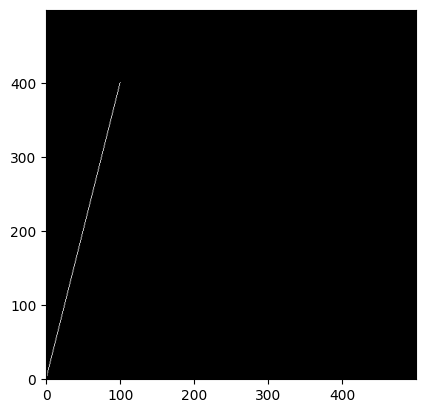

In [248]:
#draw a line
screen = np.zeros((500, 500, 3), dtype=np.uint8)
x0, y0 = 0, 0
x1, y1 = 100, 400
for t in np.linspace(0, 1, 1000):
    x = x0 + (x1-x0)*t
    y = y0 + (y1-y0)*t
    screen[int(x), int(y)] = [255, 255, 255]
screen = np.swapaxes(screen, 0, 1)
plt.imshow(screen, origin='lower')

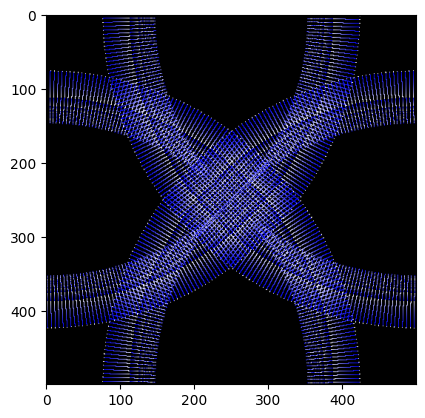

In [253]:
# rotate a line with rotation matrix
screen = np.zeros((500, 500, 3), dtype=np.uint8)
x0, y0 = 250, 250
x1, y1 = 300, 300
thetas = np.linspace(0, 2*np.pi, 500)
for theta in thetas:
    R = np.array(([np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]))
    for t in np.linspace(0.001, 1, 1000):
        x = x0 + (x1-x0)*t
        y = y0 + (y1-y0)*t
        x, y = np.dot(R, np.array([x, y]))
        n = (255/t)+.1
        p = (255/t)+.1
        screen[int(x), int(y)] = [n, p, 255]
plt.imshow(screen)

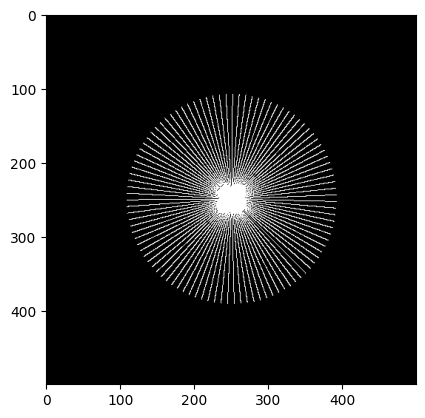

In [173]:
#translate axis to the center(0,0)
#and y goes up
screen = np.zeros((500, 500, 3), dtype=np.uint8)
x0, y0 = 0, 0
x1, y1 = 100, 100
thetas = np.linspace(0, 2*np.pi, 100)
for theta in thetas:
    R = np.array(([np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]))
    for t in np.linspace(0, 1, 1000):
        x = x0 + (x1-x0)*t
        y = y0 + (y1-y0)*t
        x, y = np.dot(R, np.array([x, y]))
        x += 250
        y -= 250
        screen[int(x), int(y)] = [255, 255, 255]  
plt.imshow(screen)

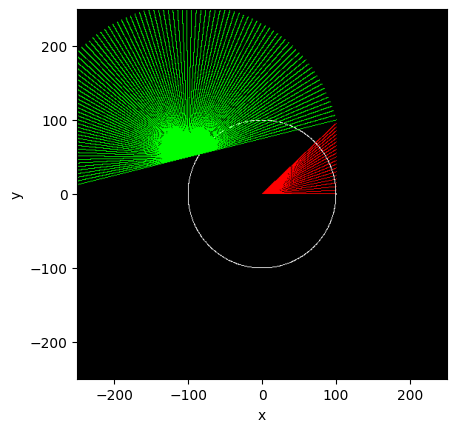

In [174]:
# #define function to translate axis to the center(0,0) and y goes up
def translate(x, y, center=250):
    x = center + x
    y = center + y
    return x, y

#define a function to draw a circle
def draw_circle(screen, x0, y0, r, color=[255, 255, 255]):
    x0, y0 = translate(x0, y0)
    for i in np.linspace(0, 2*np.pi, 1000):
        y = np.sin(i)*r + x0
        x = np.cos(i)*r + y0
        if 0 <= int(x) < screen.shape[0] and 0 <= int(y) < screen.shape[1]:
            screen[int(x), int(y)] = color
    return screen

#define function to clear screen
def clear_screen(screen):
    screen.fill(0)
    return screen

#define function to draw a line
def draw_line(screen, x0, y0, x1, y1, color=[255, 255, 255]):
    x0, y0 = translate(x0, y0)
    x1, y1 = translate(x1, y1)
    for t in np.linspace(0, 1, 1000):
        x = x0 + (x1-x0)*t
        y = y0 + (y1-y0)*t
        if 0 <= int(x) < screen.shape[0] and 0 <= int(y) < screen.shape[1]:
            screen[int(x), int(y)] = color
    return screen


# Define a function to rotate a line around (x0, y0)
def rotate_line(screen, x0, y0, x1, y1, theta=0, color=[255, 255, 255]):
    x0_t, y0_t = translate(x0, y0)
    x1_t, y1_t = translate(x1, y1)
    R = np.array(([np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]))
    for t in np.linspace(0, 1, 1000):
        x = x0_t + (x1_t - x0_t) * t
        y = y0_t + (y1_t - y0_t) * t
        x_rot, y_rot = np.dot(R, np.array([x - x0_t, y - y0_t])) + np.array([x0_t, y0_t])
        if 0 <= int(x_rot) < screen.shape[0] and 0 <= int(y_rot) < screen.shape[1]:
            screen[int(x_rot), int(y_rot)] = color
    return screen

#define a function to draw a rectangle
def draw_rectangle(screen, x0, y0, x1, y1):
    x0, y0 = translate(x0, y0)
    x1, y1 = translate(x1, y1)
    screen = draw_line(screen, x0, y0, x1, y0)
    screen = draw_line(screen, x1, y0, x1, y1)
    screen = draw_line(screen, x1, y1, x0, y1)
    screen = draw_line(screen, x0, y1, x0, y0)
    return screen

screen = np.zeros((500, 500, 3), dtype=np.uint8)
for y in range(0, 100, 5):
    screen = draw_line(screen, 0, 0, 100, y, [255, 0, 0])
# screen = draw_line(screen, 0, 0, 100, 100, [255, 0, 0])
screen = draw_circle(screen, 0, 0, 100)
thetas = np.linspace(0, np.pi, 100)
for theta in thetas:
    screen = rotate_line(screen,-100, 50, 100, 100, theta, color=[0, 255, 0])
plt.xlabel('x')
plt.ylabel('y')
screen = np.swapaxes(screen, 0, 1)
plt.imshow(screen, origin='lower', extent=[-250, 250, -250, 250])

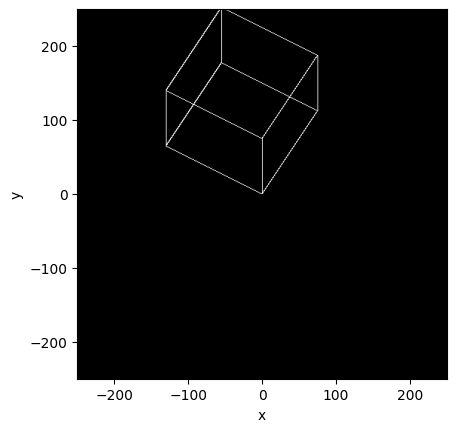

In [234]:
#project 3D points to 2D points using perspective projection and rotate
def project_rotate(x, y, z, thetas=(0,0,0), f=500):
    theta_x, theta_y, theta_z = thetas
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta_x), -np.sin(theta_x)],
        [0, np.sin(theta_x), np.cos(theta_x)]
    ])
    R_y = np.array([
        [np.cos(theta_y), 0, np.sin(theta_y)],
        [0, 1, 0],
        [-np.sin(theta_y), 0, np.cos(theta_y)]
    ])
    R_z = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0],
        [np.sin(theta_z), np.cos(theta_z), 0],
        [0, 0, 1]
    ])
    # Combine rotations
    R = np.dot(R_z, np.dot(R_y, R_x))
    x, y, z = np.dot(R, np.array([x, y, z]))  
    P = np.array([[f, 0, 0], [0, f, 0], [0, 0, 1]])
    x, y, z = np.dot(P, np.array([x, y, z]))  
    return x, y
    # if z == 0:
    #     return 0, 0
    # x = x*f/z
    # y = y*f/z
    # return x, y

screen = np.zeros((500, 500, 3), dtype=np.uint8)
# draw a cube
vertices = np.array([[0, 0, 0], [0, 100, 0], [100, 100, 0], [100, 0, 0],
                     [0, 0, 100], [0, 100, 100], [100, 100, 100], [100, 0, 100]])
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)]
f = 1.5
thetas = (np.pi/6, np.pi/3, np.pi/2)
for edge in edges:
    x0, y0, z0 = vertices[edge[0]]
    x1, y1, z1 = vertices[edge[1]]
    x0, y0 = project_rotate(x0, y0, z0, thetas=thetas, f=f)
    x1, y1 = project_rotate(x1, y1, z1, thetas=thetas, f=f)
    screen = draw_line(screen, x0, y0, x1, y1)
plt.xlabel('x')
plt.ylabel('y')
screen = np.swapaxes(screen, 0, 1)
plt.imshow(screen, origin='lower', extent=[-250, 250, -250, 250])
plt.show()